<a href="https://colab.research.google.com/github/fatihbe25/bootrainDS/blob/master/Project%2001_Global%20Terrorism%20Database/PROJECT_Global_Terrorism_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT 01 - EXPLORATORY DATA ANALYSIS - GLOBAL TERRORISM DATABASE **

---



**   My aim in this project is to find the main characteristicts of global terrorism by analysing the Global Terrorism Database in kaggle and using techniques in Exploratory Data Analysis**  

# **INTRODUCTION**


 - I downloaded csv dataset file form kaggle which contains all global terror events in the world from 1970 to 2017. 
  Source: [Kaggle Global Terrorism Database](https://www.kaggle.com/START-UMD/gtd)

-  Uploaded to google drive to use on colab. 

- I read detailed information about database [on this site.](https://start.umd.edu/gtd/) by GDT [Codebook.pdf](https://www.start.umd.edu/gtd/downloads/Codebook.pdf) file.

- The dataset has 181.691 records and 135 columns.

- There was a lot of columns and we don't need most of them in this analysis scope.

- I grouped the columns by information types. And write a function to query dataset and get result in the grouped columns. I tried querying some known events by me to understand the dataset easily. 

- There is no missing values generally because database is systematicaly filled by global groups. But some data values need to be carefully handeled. 

- By reading the database Codebook.pdf, I learned some numerical fields may contain negative value -99 or -9 for identifying some specific event data. In this analysis we don't need this info so I set 0 for these values. 

- Firstly I make basic analysis by using value counts in dataset. Then I try to show different charachteristics using visualization tools. 


In [ ]:
# data loading from drive.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

warnings.filterwarnings('ignore')



In [ ]:

gt_data=pd.read_csv("/content/drive/My Drive/DSStudyData/globalterrorismdb_0718dist.csv",low_memory=False,encoding = "ISO-8859-1")

gt_data.head(2)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


# **UNDERSTANDING DATA**

In [ ]:
gt_data.info()

gt_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


(181691, 135)

In [ ]:
for i in gt_data.dtypes.index:
     print(i , " => ", gt_data.dtypes[i] )

eventid  =>  int64
iyear  =>  int64
imonth  =>  int64
iday  =>  int64
approxdate  =>  object
extended  =>  int64
resolution  =>  object
country  =>  int64
country_txt  =>  object
region  =>  int64
region_txt  =>  object
provstate  =>  object
city  =>  object
latitude  =>  float64
longitude  =>  float64
specificity  =>  float64
vicinity  =>  int64
location  =>  object
summary  =>  object
crit1  =>  int64
crit2  =>  int64
crit3  =>  int64
doubtterr  =>  float64
alternative  =>  float64
alternative_txt  =>  object
multiple  =>  float64
success  =>  int64
suicide  =>  int64
attacktype1  =>  int64
attacktype1_txt  =>  object
attacktype2  =>  float64
attacktype2_txt  =>  object
attacktype3  =>  float64
attacktype3_txt  =>  object
targtype1  =>  int64
targtype1_txt  =>  object
targsubtype1  =>  float64
targsubtype1_txt  =>  object
corp1  =>  object
target1  =>  object
natlty1  =>  float64
natlty1_txt  =>  object
targtype2  =>  float64
targtype2_txt  =>  object
targsubtype2  =>  float64
targsu

In [ ]:
# I get all column names as a string list to use in categorization 
for c in gt_data.columns:
  print("\"{}\"".format(c), end=",")

"eventid","iyear","imonth","iday","approxdate","extended","resolution","country","country_txt","region","region_txt","provstate","city","latitude","longitude","specificity","vicinity","location","summary","crit1","crit2","crit3","doubtterr","alternative","alternative_txt","multiple","success","suicide","attacktype1","attacktype1_txt","attacktype2","attacktype2_txt","attacktype3","attacktype3_txt","targtype1","targtype1_txt","targsubtype1","targsubtype1_txt","corp1","target1","natlty1","natlty1_txt","targtype2","targtype2_txt","targsubtype2","targsubtype2_txt","corp2","target2","natlty2","natlty2_txt","targtype3","targtype3_txt","targsubtype3","targsubtype3_txt","corp3","target3","natlty3","natlty3_txt","gname","gsubname","gname2","gsubname2","gname3","gsubname3","motive","guncertain1","guncertain2","guncertain3","individual","nperps","nperpcap","claimed","claimmode","claimmode_txt","claim2","claimmode2","claimmode2_txt","claim3","claimmode3","claimmode3_txt","compclaim","weaptype1","we

Database columns  grouped by logicaly. 
From Codebook.pdf  

writen a function to easyl query and identify database in groups to prepare an analysis.

In [ ]:
# FUNCTION TO QUERY AND SHOW INFO IN GROUPS  WITH ONLY COLUMNS IN THE RELATED GROUP:  

def Query_GTD(year=0,month=0,day=0,country="",city="",include_column_groups=[],event_title=""):

  COLUMN_GROUPS={
      
  "ID_AND_TIME": ("I. GTD ID and Date", ["eventid","iyear","imonth","iday","extended"]),
  "INCIDENT"   : ("II. Incident Information ",["multiple","related","doubtterr"]),
  "LOCATION"   : ("III. Incident Location ",["country","country_txt","region","region_txt","provstate","city","specificity","latitude","longitude"]),
  "ATTACK"     : ("IV. Attack Information",["attacktype1","attacktype1_txt","attacktype2","attacktype2_txt","attacktype3","attacktype3_txt","suicide","success"]),
  "WEAPON"     : ("V. Weapon Information",["weaptype1","weaptype1_txt","weapsubtype1","weapsubtype1_txt",
                "weaptype2","weaptype2_txt","weapsubtype2","weapsubtype2_txt",
                "weaptype3","weaptype3_txt","weapsubtype3","weapsubtype3_txt",
                "weaptype4","weaptype4_txt","weapsubtype4","weapsubtype4_txt",
                "weapdetail"]),

  "TARGET" : ("VI. Target/Victim Information",["targtype1","targtype1_txt","targsubtype1","targsubtype1_txt","corp1","target1","natlty1","natlty1_txt",
          "targtype2","targtype2_txt","targsubtype2","targsubtype2_txt","corp2","target2","natlty2","natlty2_txt",
          "targtype3","targtype3_txt","targsubtype3","targsubtype3_txt","corp3","target3","natlty3","natlty3_txt",
          ]),

  "PERPETRATOR":("VII. Perpetrator Information",["individual","nperps","nperpcap",
          "gname","gsubname","guncertain1", "claimed","claimmode","claimmode_txt",
          "gname2","gsubname2","guncertain2","claim2","claimmode2",
          "gname3","gsubname3","guncertain3","claim3","claimmode3",
          "compclaim",
          "motive"
          ]),

  "CONSEQUENCE":("VIII. Casualties and Consequences",["nkill","nkillus","nkillter","nwound","nwoundus","nwoundte",
            "property","propextent","propextent_txt","propvalue","propcomment",
            "ishostkid","nhostkid","nhostkidus",
            "nhours","ndays","divert","kidhijcountry"
            ,"ransom","ransomamt","ransomamtus","ransompaid","ransompaidus","ransomnote",
            "hostkidoutcome","hostkidoutcome_txt","nreleased"
          ]),
  "ADDITIONAL":("IX. Additional Information and Sources",["addnotes","INT_LOG","INT_IDEO","INT_MISC","INT_ANY","scite1","scite2","scite3"])
          } 


  filter_data=gt_data[ ( (year==0) | (gt_data.iyear==year)) & ( (month==0) | (gt_data.imonth==month)) & ( (day==0) | (gt_data.iday==day) ) 
      & ( (country=="") | (gt_data.country_txt==country) ) & ( (city=="") | ( gt_data.city==city ) )
       ]

  print("*"*100 , "\n", "*"*4 ,  " " , event_title, " " , "*"*4,"\n","*"*100)

  for key in COLUMN_GROUPS:

    if (include_column_groups=="") | (include_column_groups=="ALL") | (len(include_column_groups)==0) | ("ALL" in include_column_groups) | (key in include_column_groups):
      title,columns = COLUMN_GROUPS[key]
      print("\n" + ("-" * 50) + "\n" + title + "\n" + ("-" * 50) )
      display(filter_data[columns].head(3))
      print("\n" + ("-" * 50) )



# QUERY SAMPLES : 
# I run the function with the events' parameter I know to understand database fields  easily.

# 10 October 2015 Event near Ankara Train Station. 
# Query_GTD (year=2015,month=10,day=10,country="Turkey",city="Ankara"
# ,include_column_groups=["ID_AND_TIME","INCIDENT","LOCATION","ATTACK","WEAPON","TARGET","PERPETRATOR","CONSEQUENCE","ADDITIONAL"]
#  ,event_title="10 October 2015, Event near Ankara Train Station.")

#11 september 2001 - USA Event
Query_GTD (year=2001,month=9,day=11,country="United States",city="New York City"
,include_column_groups=["ALL"],event_title="11 september 2001 - USA Event")


#gt_data[(gt_data.iyear==2001) & (gt_data.imonth==9) & (gt_data.iday==11) & (gt_data.country==217)]


**************************************************************************************************** 
 ****   11 september 2001 - USA Event   **** 
 ****************************************************************************************************

--------------------------------------------------
I. GTD ID and Date
--------------------------------------------------


,eventid,iyear,imonth,iday,extended
73126,200109110004,2001,9,11,0
73127,200109110005,2001,9,11,0



--------------------------------------------------

--------------------------------------------------
II. Incident Information 
--------------------------------------------------


,multiple,related,doubtterr
73126,1.0,"200109110004, 200109110005, 200109110006, 2001...",0.0
73127,1.0,"200109110005, 200109110004, 200109110006, 2001...",0.0



--------------------------------------------------

--------------------------------------------------
III. Incident Location 
--------------------------------------------------


,country,country_txt,region,region_txt,provstate,city,specificity,latitude,longitude
73126,217,United States,1,North America,New York,New York City,1.0,40.697132,-73.931351
73127,217,United States,1,North America,New York,New York City,1.0,40.697132,-73.931351



--------------------------------------------------

--------------------------------------------------
IV. Attack Information
--------------------------------------------------


,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,suicide,success
73126,4,Hijacking,2.0,Armed Assault,NaN,NaN,1,1
73127,4,Hijacking,2.0,Armed Assault,NaN,NaN,1,1



--------------------------------------------------

--------------------------------------------------
V. Weapon Information
--------------------------------------------------


,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail
73126,10,Vehicle (not to include vehicle-borne explosiv...,NaN,NaN,8.0,Incendiary,20.0,Gasoline or Alcohol,9.0,Melee,23.0,Knife or Other Sharp Object,NaN,NaN,NaN,NaN,The attackers reportedly gained control of the...
73127,10,Vehicle (not to include vehicle-borne explosiv...,NaN,NaN,8.0,Incendiary,20.0,Gasoline or Alcohol,9.0,Melee,23.0,Knife or Other Sharp Object,NaN,NaN,NaN,NaN,The attackers reportedly gained control of the...



--------------------------------------------------

--------------------------------------------------
VI. Target/Victim Information
--------------------------------------------------


,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt
73126,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Civilians,Passengers and crew members on American Airlin...,217.0,United States,1.0,Business,3.0,Bank/Commerce,World Trade Center Complex,Businesses operating inside the Twin Towers,217.0,United States,6.0,Airports & Aircraft,42.0,Aircraft (not at an airport),American Airlines,American Airlines-owned Boeing 767 passenger j...,217.0,United States
73127,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Civilians,Passengers and crew members on United Airlines...,217.0,United States,1.0,Business,3.0,Bank/Commerce,World Trade Center Complex,Businesses operating inside the Twin Towers,217.0,United States,6.0,Airports & Aircraft,42.0,Aircraft (not at an airport),United Airlines,United Airlines-owned Boeing 767 passenger jet...,217.0,United States



--------------------------------------------------

--------------------------------------------------
VII. Perpetrator Information
--------------------------------------------------


,individual,nperps,nperpcap,gname,gsubname,guncertain1,claimed,claimmode,claimmode_txt,gname2,gsubname2,guncertain2,claim2,claimmode2,gname3,gsubname3,guncertain3,claim3,claimmode3,compclaim,motive
73126,0,5.0,0.0,Al-Qaida,NaN,0.0,1.0,6.0,Video,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.0,Unknown
73127,0,5.0,0.0,Al-Qaida,NaN,0.0,1.0,6.0,Video,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.0,Unknown



--------------------------------------------------

--------------------------------------------------
VIII. Casualties and Consequences
--------------------------------------------------


,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased
73126,1384.0,1360.0,5.0,8190.0,NaN,0.0,1,1.0,Catastrophic (likely >= $1 billion),NaN,The crash resulted in the destruction of an Am...,1.0,88.0,86.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.0,Hostage(s) killed (not during rescue attempt),0.0
73127,1383.0,1327.0,5.0,8191.0,NaN,0.0,1,1.0,Catastrophic (likely >= $1 billion),NaN,The crash resulted in the destruction of an Un...,1.0,59.0,54.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.0,Hostage(s) killed (not during rescue attempt),0.0



--------------------------------------------------

--------------------------------------------------
IX. Additional Information and Sources
--------------------------------------------------


,addnotes,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,scite1,scite2,scite3
73126,This attack was one of four related incidents ...,0,1,0,1,"United States Government, The 9/11 Commission ...","Lindsay Kines, United States on high alert af...","Joe Frolick, Hijackers Ram Two Airliners Into..."
73127,This attack was one of four related incidents ...,0,1,0,1,"United States Government, The 9/11 Commission ...","Lindsay Kines, United States on high alert af...","Joe Frolick, Hijackers Ram Two Airliners Into..."



--------------------------------------------------


Now I will create a new dataframe with only interested columns and will try to fine corralation. But before starting this I will checkt values stored in the fields to see if any strange values exists. I will use value_counts() method for this purpose.

In [ ]:

gt_data2=gt_data[["eventid","iyear","imonth","region_txt","country_txt","latitude","longitude","gname","targtype1_txt","weaptype1_txt","nkill","nkillter","nwound","nwoundte","nperps","property","propvalue","success"]].copy()


gt_data2.head(2)





,eventid,iyear,imonth,region_txt,country_txt,latitude,longitude,gname,targtype1_txt,weaptype1_txt,nkill,nkillter,nwound,nwoundte,nperps,property,propvalue,success
0,197000000001,1970,7,Central America & Caribbean,Dominican Republic,18.456792,-69.951164,MANO-D,Private Citizens & Property,Unknown,1.0,NaN,0.0,NaN,NaN,0,NaN,1
1,197000000002,1970,0,North America,Mexico,19.371887,-99.086624,23rd of September Communist League,Government (Diplomatic),Unknown,0.0,NaN,0.0,NaN,7.0,0,NaN,1



From now on   I will use gt_data2 dataframe. *italicised text*

# **PREPARING DATA**

In [ ]:
(gt_data2.isnull().sum()/gt_data2.shape[0] ) *100



eventid           0.000000
iyear             0.000000
imonth            0.000000
region_txt        0.000000
country_txt       0.000000
latitude          2.507554
longitude         2.508104
gname             0.000000
targtype1_txt     0.000000
weaptype1_txt     0.000000
nkill             5.676120
nkillter         36.852678
nwound            8.977330
nwoundte         38.055270
nperps           39.140629
property          0.000000
propvalue        78.541039
success           0.000000
dtype: float64

As we check missing value rates by columns, numerical columns have a some missing values. We can set zero for these values to safe our analysis, because some analysis methods will not run with Nan values.




In [ ]:
#I get the missing values to a series. 
missings=(gt_data2.isnull().sum()/gt_data2.shape[0] ) *100

#loop on index'es having missing values, filter rows those have missing values for the related index and update the column with zero... 
print("BEFORE\n","-"*100)
for ix in missings[missings>0].index:
  print(ix , " => ",missings[ix])
  gt_data2.loc[gt_data2[ix].isnull(),ix ]=0

print("AFTER\n","-"*100)
#check if missing values cleared.. 
display( (gt_data2.isnull().sum()/gt_data2.shape[0] ) *100 )


BEFORE
 ----------------------------------------------------------------------------------------------------
latitude  =>  2.507554034046816
longitude  =>  2.5081044190411195
nkill  =>  5.676120446252153
nkillter  =>  36.85267844857478
nwound  =>  8.977329642084639
nwoundte  =>  38.05526966112796
nperps  =>  39.14062886989449
propvalue  =>  78.54103945710024
AFTER
 ----------------------------------------------------------------------------------------------------


eventid          0.0
iyear            0.0
imonth           0.0
region_txt       0.0
country_txt      0.0
latitude         0.0
longitude        0.0
gname            0.0
targtype1_txt    0.0
weaptype1_txt    0.0
nkill            0.0
nkillter         0.0
nwound           0.0
nwoundte         0.0
nperps           0.0
property         0.0
propvalue        0.0
success          0.0
dtype: float64

We set zero for -99 or -9 values in there columns we found by using value_counts() method. 

In [ ]:
gt_data2.loc[gt_data2.nperps<0,"nperps"]=0
gt_data2.loc[gt_data2.property<0,"property"]=0
gt_data2.loc[gt_data2.propvalue<0,"propvalue"]=0


I want to define a column by adding kill and wound counts to show affect of attacks on one column. 

In [ ]:
gt_data2["affectedpeople"]=gt_data2["nkill"] + gt_data2["nwound"]
gt_data2.head(2)

,eventid,iyear,imonth,region_txt,country_txt,latitude,longitude,gname,targtype1_txt,weaptype1_txt,nkill,nkillter,nwound,nwoundte,nperps,property,propvalue,success,affectedpeople
0,197000000001,1970,7,Central America & Caribbean,Dominican Republic,18.456792,-69.951164,MANO-D,Private Citizens & Property,Unknown,1.0,0.0,0.0,0.0,0.0,0,0.0,1,1.0
1,197000000002,1970,0,North America,Mexico,19.371887,-99.086624,23rd of September Communist League,Government (Diplomatic),Unknown,0.0,0.0,0.0,0.0,7.0,0,0.0,1,0.0


# **ANALAYSIS PHASE**

# **Basic Analysis**

In [ ]:
gt_data2.describe()

,eventid,iyear,imonth,latitude,longitude,nkill,nkillter,nwound,nwoundte,nperps,property,propvalue,success,affectedpeople
count,1.816910e+05,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,22.909109,-4.471911e+02,2.266860,0.320825,2.883296,0.066382,5.020750,0.514792,4.482445e+04,0.889598,5.150156
std,1.325957e+09,13.259430,3.388303,18.699442,2.021946e+05,11.227057,3.346474,34.309747,1.172976,163.325894,0.499783,7.192040e+06,0.313391,40.555416
min,1.970000e+11,1970.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,9.518645,1.231572e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,31.126646,4.314357e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,34.538560,6.835734e+01,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,74.633553,1.793667e+02,1570.000000,500.000000,8191.000000,200.000000,25000.000000,1.000000,2.700000e+09,1.000000,9574.000000


Using the result of describe method we can not learn much things, except the following interesting information.

  - Maximum number of terrorists killed in an event is 500. 
        -->(Nepal, 2004, Communist Party of Nepal- Maoist (CPN-M),  nkill=518, 
                        nkillter=500, nwound=216, nwoundte=200) 
  
  - Maximum number of total wounds in an event is 8191.
          --> (USA, 2001, Al-Qaida , nkill=1383, nkillter=5, nperps=5)
  
  - Maximum number of perpetrator performing an attack is 25000. 
          --> (Bangladesh, 1994, Islamist extremists, ...)
  
  - Maximum value of property demage reported in an event is 2.700.000.000 USD
          --> (UK, 1992 , Irish Republican Army (IRA),nkill=3 , nwound=90, Explossive)

Looking only value counts in dataset for different columns we can say very basic information about terrorist attack in the world.

In [ ]:
list1=[ ["country_txt","Top 5 countries with the most terror attaks","Top 5 countries with the least terror attack"],
       ["region_txt","Top 5 regions with the most terror attaks","Top 5 regions with the least terror attack"],
       ["targtype1_txt","Top 5 targets having most terror attaks","Top 5 targets having least terror attack"],
       ["weaptype1_txt","Top 5 weapons mostly used in terror attaks","Top 5 weapons leastly used in terror attack"],
       ["gname","Top 5 group with the most terror attack",""],
       ["iyear","Top 5 years with the most terror attack","Top 5 years with the least terror attack"],
       ["nkill","Top 5 events with the most deaths","X"],
       ["affectedpeople","Top 5 events with the most people affected","X"],
       ["propvalue","Top 5 events with the most property demages","X"],
       ["nperps","Top 5 events with the most perpendators","X"]
       
]

for l in list1:
  column=l[0]
  t5=l[1]
  l5=l[2]
  print("-"*100,"\n",t5 , "\n","-"*100)
  N=5
  c=len(gt_data2[column].value_counts())
  if c<5:
    N=c
  if l5=="X":
    d=gt_data2[column].value_counts().sort_index(ascending=False)
    display(list(d.index[:5]))
  elif l5!="":
    top5=gt_data2[column].value_counts()[:N]
    display(top5)
    print("-"*100,"\n",l5 , "\n","-"*100)
    least5=gt_data2[column].value_counts().sort_values()[:N]
    display(least5)
  
  print("*"*100)



---------------------------------------------------------------------------------------------------- 
 Top 5 countries with the most terror attaks 
 ----------------------------------------------------------------------------------------------------


Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: country_txt, dtype: int64

---------------------------------------------------------------------------------------------------- 
 Top 5 countries with the least terror attack 
 ----------------------------------------------------------------------------------------------------


International        1
Falkland Islands     1
South Vietnam        1
Wallis and Futuna    1
St. Lucia            1
Name: country_txt, dtype: int64

****************************************************************************************************
---------------------------------------------------------------------------------------------------- 
 Top 5 regions with the most terror attaks 
 ----------------------------------------------------------------------------------------------------


Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: region_txt, dtype: int64

---------------------------------------------------------------------------------------------------- 
 Top 5 regions with the least terror attack 
 ----------------------------------------------------------------------------------------------------


Australasia & Oceania     282
Central Asia              563
East Asia                 802
North America            3456
Eastern Europe           5144
Name: region_txt, dtype: int64

****************************************************************************************************
---------------------------------------------------------------------------------------------------- 
 Top 5 targets having most terror attaks 
 ----------------------------------------------------------------------------------------------------


Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: targtype1_txt, dtype: int64

---------------------------------------------------------------------------------------------------- 
 Top 5 targets having least terror attack 
 ----------------------------------------------------------------------------------------------------


Other                   137
Abortion Related        263
Food or Water Supply    317
Maritime                351
Tourists                440
Name: targtype1_txt, dtype: int64

****************************************************************************************************
---------------------------------------------------------------------------------------------------- 
 Top 5 weapons mostly used in terror attaks 
 ----------------------------------------------------------------------------------------------------


Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: weaptype1_txt, dtype: int64

---------------------------------------------------------------------------------------------------- 
 Top 5 weapons leastly used in terror attack 
 ----------------------------------------------------------------------------------------------------


Radiological                                                                    14
Fake Weapons                                                                    33
Biological                                                                      35
Other                                                                          114
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)    136
Name: weaptype1_txt, dtype: int64

****************************************************************************************************
---------------------------------------------------------------------------------------------------- 
 Top 5 group with the most terror attack 
 ----------------------------------------------------------------------------------------------------
****************************************************************************************************
---------------------------------------------------------------------------------------------------- 
 Top 5 years with the most terror attack 
 ----------------------------------------------------------------------------------------------------


2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
Name: iyear, dtype: int64

---------------------------------------------------------------------------------------------------- 
 Top 5 years with the least terror attack 
 ----------------------------------------------------------------------------------------------------


1971    471
1973    473
1972    568
1974    581
1970    651
Name: iyear, dtype: int64

****************************************************************************************************
---------------------------------------------------------------------------------------------------- 
 Top 5 events with the most deaths 
 ----------------------------------------------------------------------------------------------------


[1570.0, 1384.0, 1383.0, 1180.0, 953.0]

****************************************************************************************************
---------------------------------------------------------------------------------------------------- 
 Top 5 events with the most people affected 
 ----------------------------------------------------------------------------------------------------


[9574.0, 5513.0, 4224.0, 1570.0, 1503.0]

****************************************************************************************************
---------------------------------------------------------------------------------------------------- 
 Top 5 events with the most property demages 
 ----------------------------------------------------------------------------------------------------


[2700000000.0, 1079120000.0, 652000000.0, 548000000.0, 350000000.0]

****************************************************************************************************
---------------------------------------------------------------------------------------------------- 
 Top 5 events with the most perpendators 
 ----------------------------------------------------------------------------------------------------


[25000.0, 20000.0, 10000.0, 5000.0, 3200.0]

****************************************************************************************************


In [ ]:
print("Success Rate")
display(gt_data2.groupby("success").agg({"success":["count",lambda x:(x.count()/gt_data2.shape[0])*100]}))
print("Property Damage Rate:")
display(gt_data2.groupby("property").agg({"property":["count",lambda x:(x.count()/gt_data2.shape[0])*100]}))

Success Rate


success           
          count <lambda_0>
success                   
0         20059  11.040173
1        161632  88.959827

Property Damage Rate:


property           
            count <lambda_0>
property                    
0           88158   48.52084
1           93533   51.47916


*   %89 of terrorist attack is successfull (in the meaning of the damages was occured.)
*   %51 of terrorist attack causes property demages. 



# **Attack Distribution by Region, Country, Group or Year**

Regional success rates

In [ ]:
success_rates_by_region=gt_data2.groupby(["region_txt"]).agg({"success":["sum","count",lambda x:x.mean()*100]})
success_rates_by_region.columns=["_".join(x) for x in success_rates_by_region.columns.ravel()]
success_rates_by_region.rename(columns={"success_sum":"successfull_events","success_count":"total_events","success_<lambda_0>":"success_avg_percnt"},inplace=True)
success_rates_by_region.sort_values(["success_avg_percnt"],ascending=False)

,successfull_events,total_events,success_avg_percnt
region_txt,,,
Central America & Caribbean,9979,10344,96.471384
South America,17620,18978,92.844346
Sub-Saharan Africa,16277,17550,92.746439
Central Asia,505,563,89.698046
Southeast Asia,11151,12485,89.315178
Middle East & North Africa,44319,50474,87.805603
South Asia,39369,44974,87.537244
Eastern Europe,4437,5144,86.255832
Western Europe,14161,16639,85.107278


**Most damaging terrorist groups by regions ( demage = sum of death and wound count)**

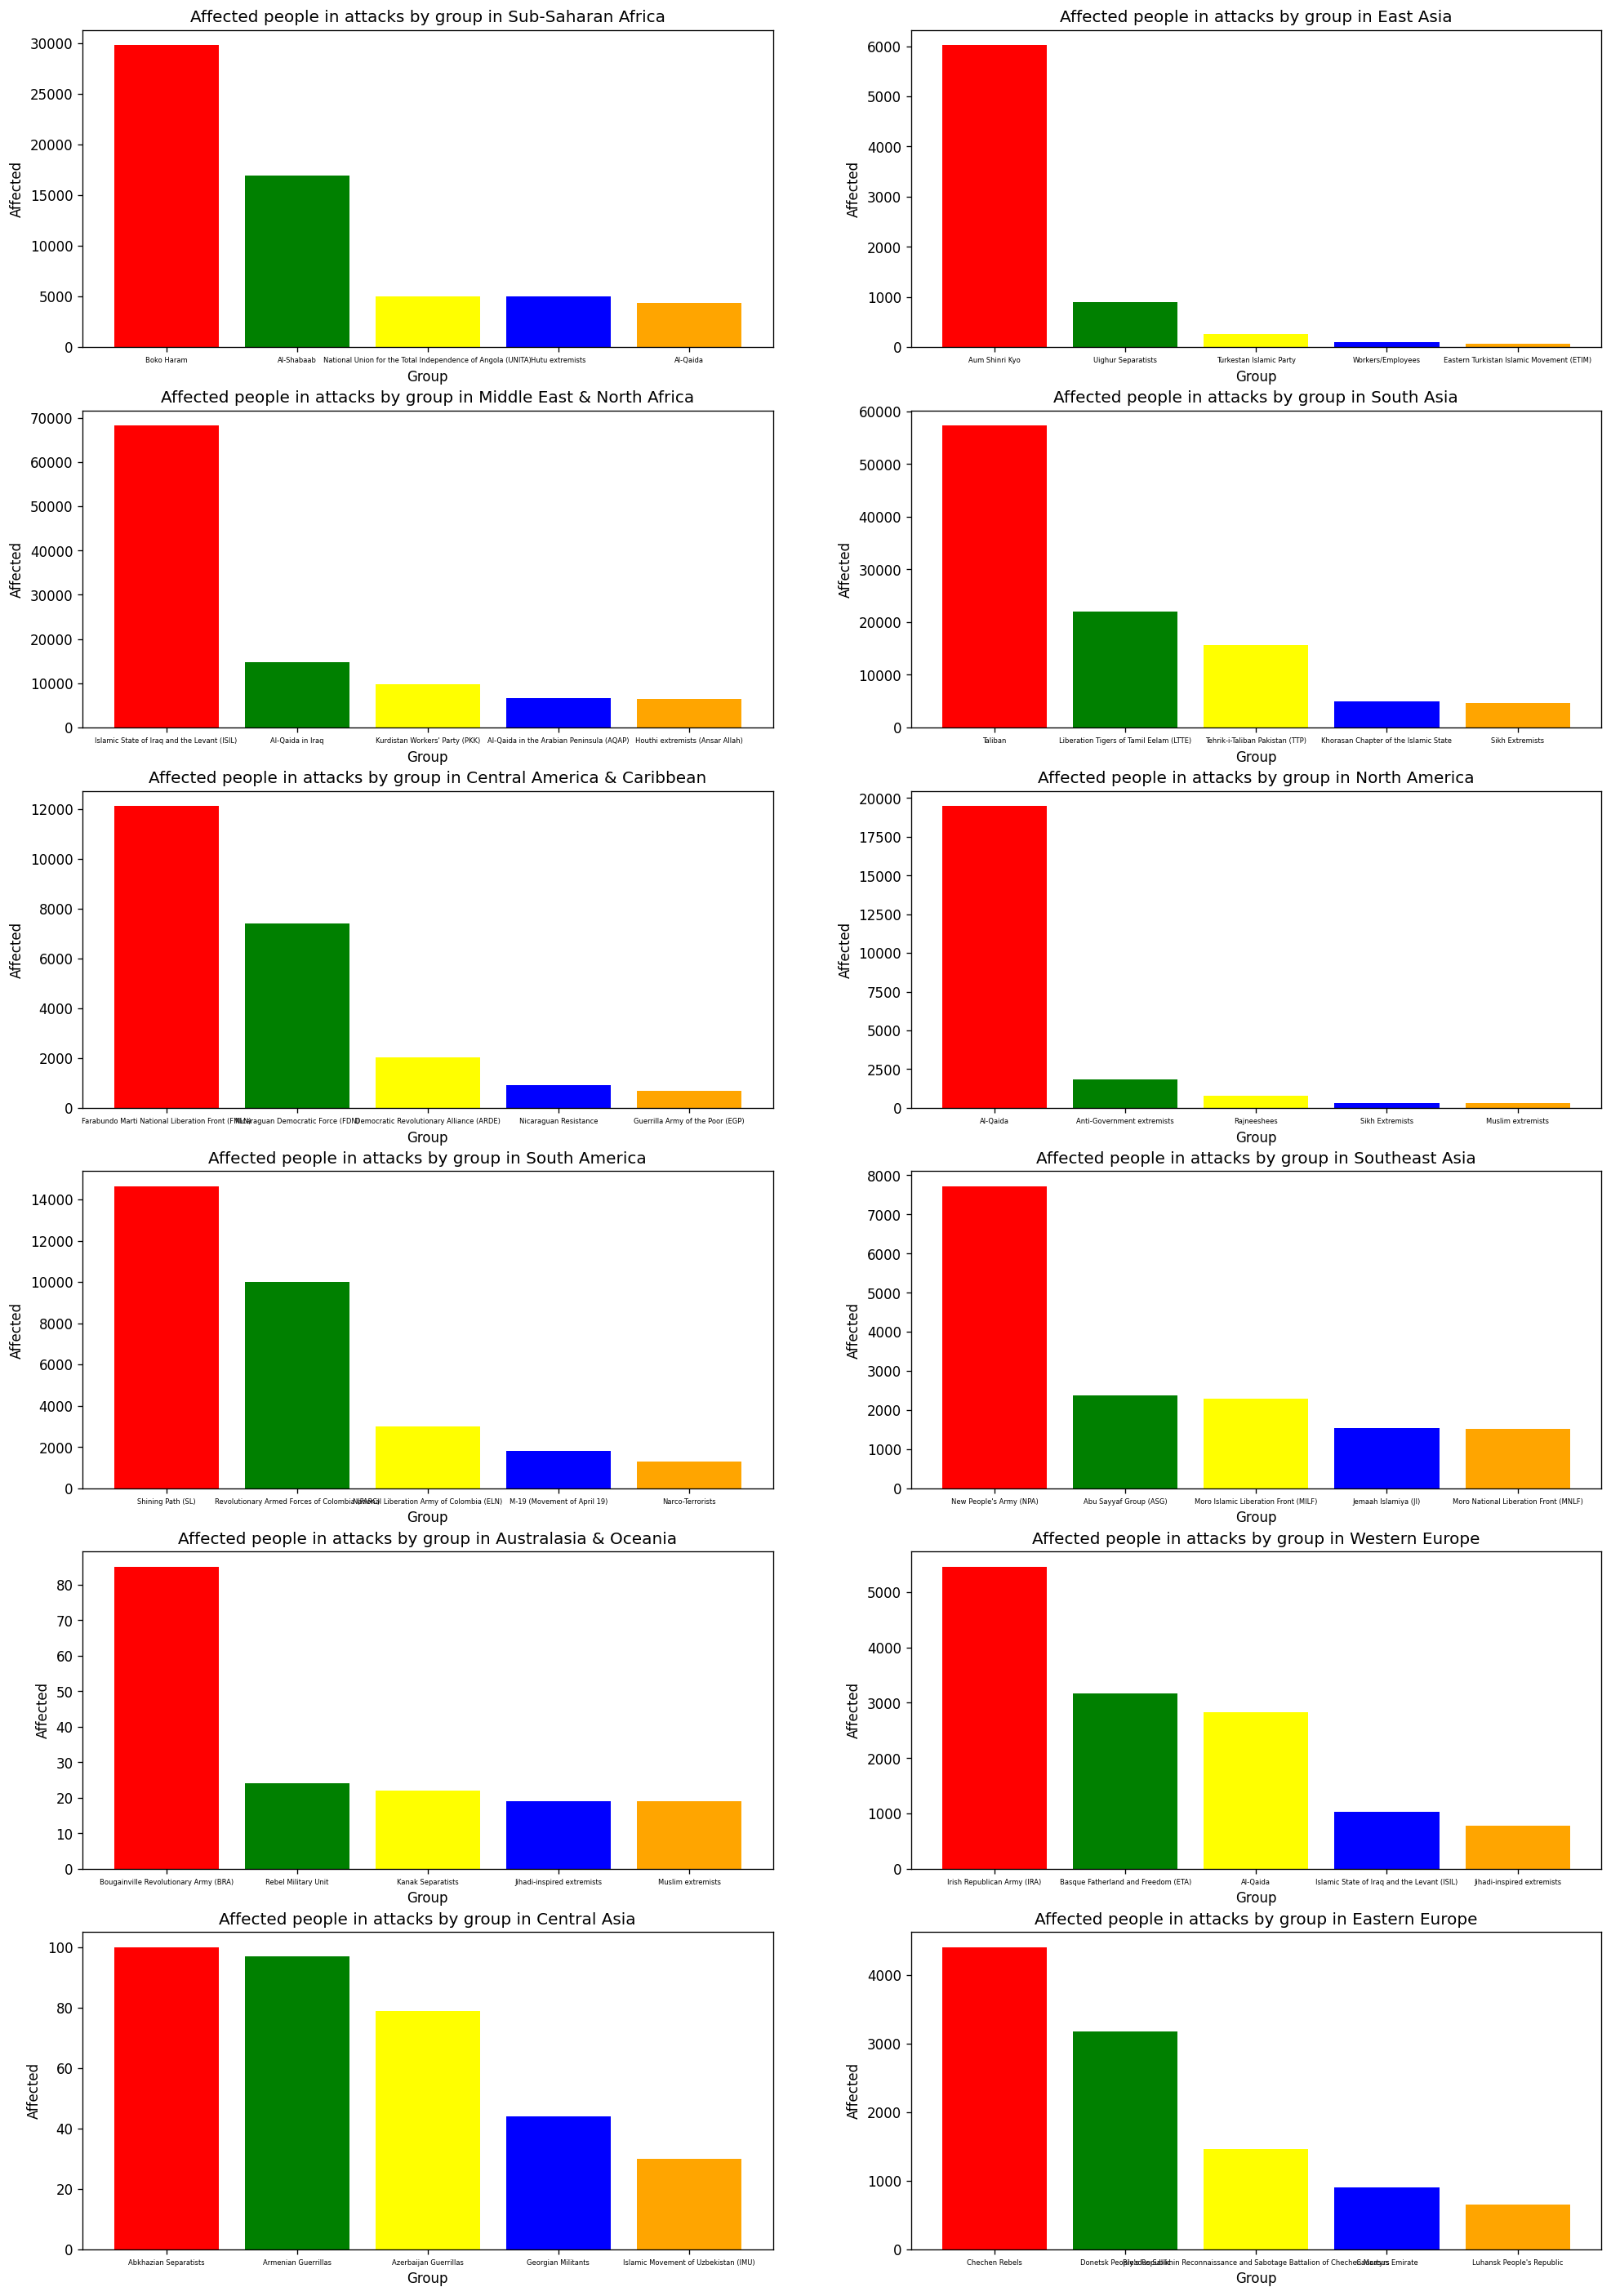

In [ ]:
# gt_data_2017=gt_data2[(gt_data2.iyear==2017 )]
# gt_data_2017 

gdata=gt_data2[gt_data2.gname!="Unknown"].groupby(["region_txt","gname"]).agg({"affectedpeople":["sum"]})

gdatabig=gdata[gdata[("affectedpeople","sum")]>10]

gdatabig.columns=["affected_sum"]

#gdatabig.xs(region).sort_values(by="affected_sum",ascending=False)[:5].reset_index()

plt.figure(figsize=(20,30),dpi=120)

regions=set(gdatabig.index.get_level_values(level=0))
n=1
rc=len(regions)
if rc%2!=0:
  rc+=1
nc=rc/2

plt.rcParams['xtick.labelsize'] =5

for region in regions:
   plt.subplot(nc,2,n)
   n+=1
   rgdata=gdatabig.xs(region).sort_values(by="affected_sum",ascending=False)[:5].reset_index()
   plt.bar(data=rgdata, x="gname", height="affected_sum",color=["red","green","yellow","blue","orange"])

  #  fig = px.bar(rgdata, x='gname', y='affected_sum',
  #            hover_data=['gname', 'affected_sum'], color='gname',
  #            title="Top 5 terrorist groups in {}".format(region),
  #            labels={'Group':'Group Name'}, height=400)
  #  fig.show()

   plt.xlabel("Group")
   plt.ylabel("Affected")
   #plt.xticks(rotation=30)
   plt.title("Affected people in attacks by group in {}".format(region))
plt.show()


**Number of affected people in attacks and event counts by year.**

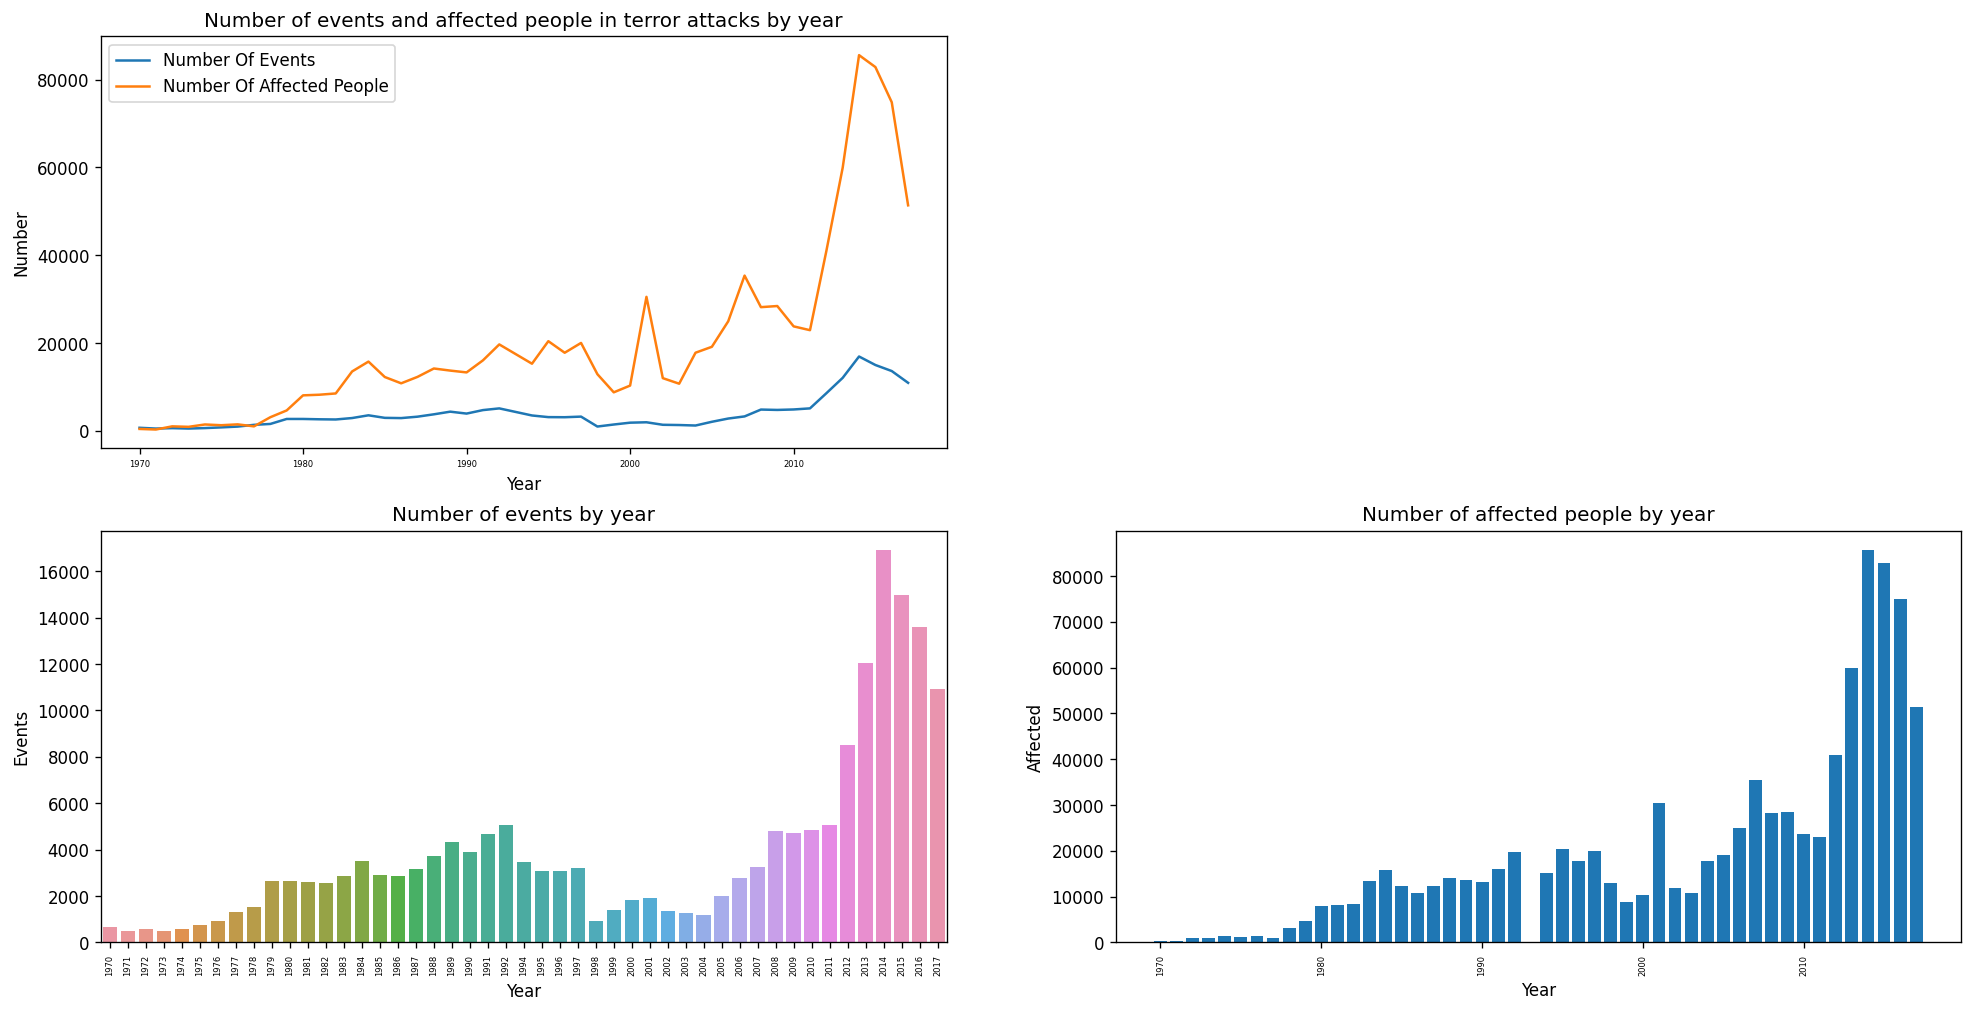

In [ ]:
rdata2= gt_data2.groupby(["iyear"]).agg({"affectedpeople":["sum","count"]})

rdata2.columns=["_".join(x) for x in rdata2.columns.ravel()]

#rdata2

plt.figure(figsize=(20,10),dpi=120)

plt.subplot(2,2,1)

e=sns.lineplot(data=rdata2, x=rdata2.index,y="affectedpeople_count", palette="orange", label="Number Of Events")
k=sns.lineplot(data=rdata2, x=rdata2.index,y="affectedpeople_sum", palette="blue", label="Number Of Affected People")
plt.title("Number of events and affected people in terror attacks by year")
plt.ylabel("Number")
plt.xlabel("Year")
plt.legend(loc="best")

plt.subplot(2,2,3)
sns.countplot(data=gt_data2,x="iyear")
plt.title("Number of events by year")
plt.ylabel("Events")
plt.xlabel("Year")
plt.xticks(rotation=90)

plt.subplot(2,2,4)
plt.bar(data=rdata2,x=rdata2.index,height="affectedpeople_sum")
plt.title("Number of affected people by year")
plt.ylabel("Affected")
plt.xlabel("Year")
plt.xticks(rotation=90)

plt.show()



This graph shows that starting from the end of 2010, number of affected people in attacks quite increases. Event counts and affected people counts generaly show same trend, but in some years for example 2001 event count stays almost same with the previous year but affected people count quite increases. Possibilly 11.9 event causes this difference the affected people in events related with 11.9 are very high.

**Most dangeorous groups shown in world map**

In [ ]:

d=gt_data2[gt_data2.gname!="Unknown"].groupby("gname").agg({"affectedpeople":["sum","count",lambda x:x.sum()*x.count()]})

d.columns=["affected_sum","event_count","effect_factor"]

most_effective_groups=list(d.sort_values(by=["effect_factor"],ascending=False)[:20].index)

most_effective_groups


['Taliban',
 'Islamic State of Iraq and the Levant (ISIL)',
 'Boko Haram',
 'Shining Path (SL)',
 'Al-Shabaab',
 'Farabundo Marti National Liberation Front (FMLN)',
 'Liberation Tigers of Tamil Eelam (LTTE)',
 'Revolutionary Armed Forces of Colombia (FARC)',
 "Kurdistan Workers' Party (PKK)",
 "New People's Army (NPA)",
 'Tehrik-i-Taliban Pakistan (TTP)',
 'Irish Republican Army (IRA)',
 'Al-Qaida in Iraq',
 'Communist Party of India - Maoist (CPI-Maoist)',
 'Houthi extremists (Ansar Allah)',
 'Al-Qaida in the Arabian Peninsula (AQAP)',
 'Nicaraguan Democratic Force (FDN)',
 'Basque Fatherland and Freedom (ETA)',
 'Maoists',
 'National Liberation Army of Colombia (ELN)']

In [ ]:

# [d.index=="Al-Qaida"]
#[d.index=="Aum Shinri Kyo"]
d.sort_values(by=["effect_factor"],ascending=False).head(20)

,affected_sum,event_count,effect_factor
gname,,,
Taliban,57342.0,7478,428803476.0
Islamic State of Iraq and the Levant (ISIL),69595.0,5613,390636735.0
Boko Haram,29801.0,2418,72058818.0
Shining Path (SL),14632.0,4555,66648760.0
Al-Shabaab,16954.0,3288,55744752.0
Farabundo Marti National Liberation Front (FMLN),12130.0,3351,40647630.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0,1606,35364120.0
Revolutionary Armed Forces of Colombia (FARC),10015.0,2487,24907305.0
Kurdistan Workers' Party (PKK),9863.0,2310,22783530.0


In [ ]:
gt_data_by_meg= gt_data2[ (gt_data2.affectedpeople>0) &  (gt_data2.gname.isin(most_effective_groups)) ]
#gt_data_by_meg.affectedpeople.value_counts()
gt_data_by_meg_20=gt_data_by_meg[gt_data_by_meg.affectedpeople>=20]
fig1 = px.scatter_geo(gt_data_by_meg_20,lat="latitude",lon="longitude",color="gname", size="affectedpeople")
fig1.show()


In [ ]:
gt_data_by_meg_0=gt_data_by_meg[gt_data_by_meg.affectedpeople<20]

fig2 = px.scatter_geo(gt_data_by_meg_0,lat="latitude",lon="longitude",color="gname", size="affectedpeople")
fig2.show()

**Weapon types used by most damaging terror groups in world.**

In [ ]:
gt_data_by_meg_W=gt_data_by_meg[(gt_data_by_meg.weaptype1_txt!="Other") & (gt_data_by_meg.weaptype1_txt!="Unknown") & (gt_data_by_meg.affectedpeople>=20) ]
#gt_data_by_meg_20.head()
fig3 = px.scatter_geo(gt_data_by_meg_W,lat="latitude",lon="longitude",color="weaptype1_txt", size="affectedpeople")
fig3.show()

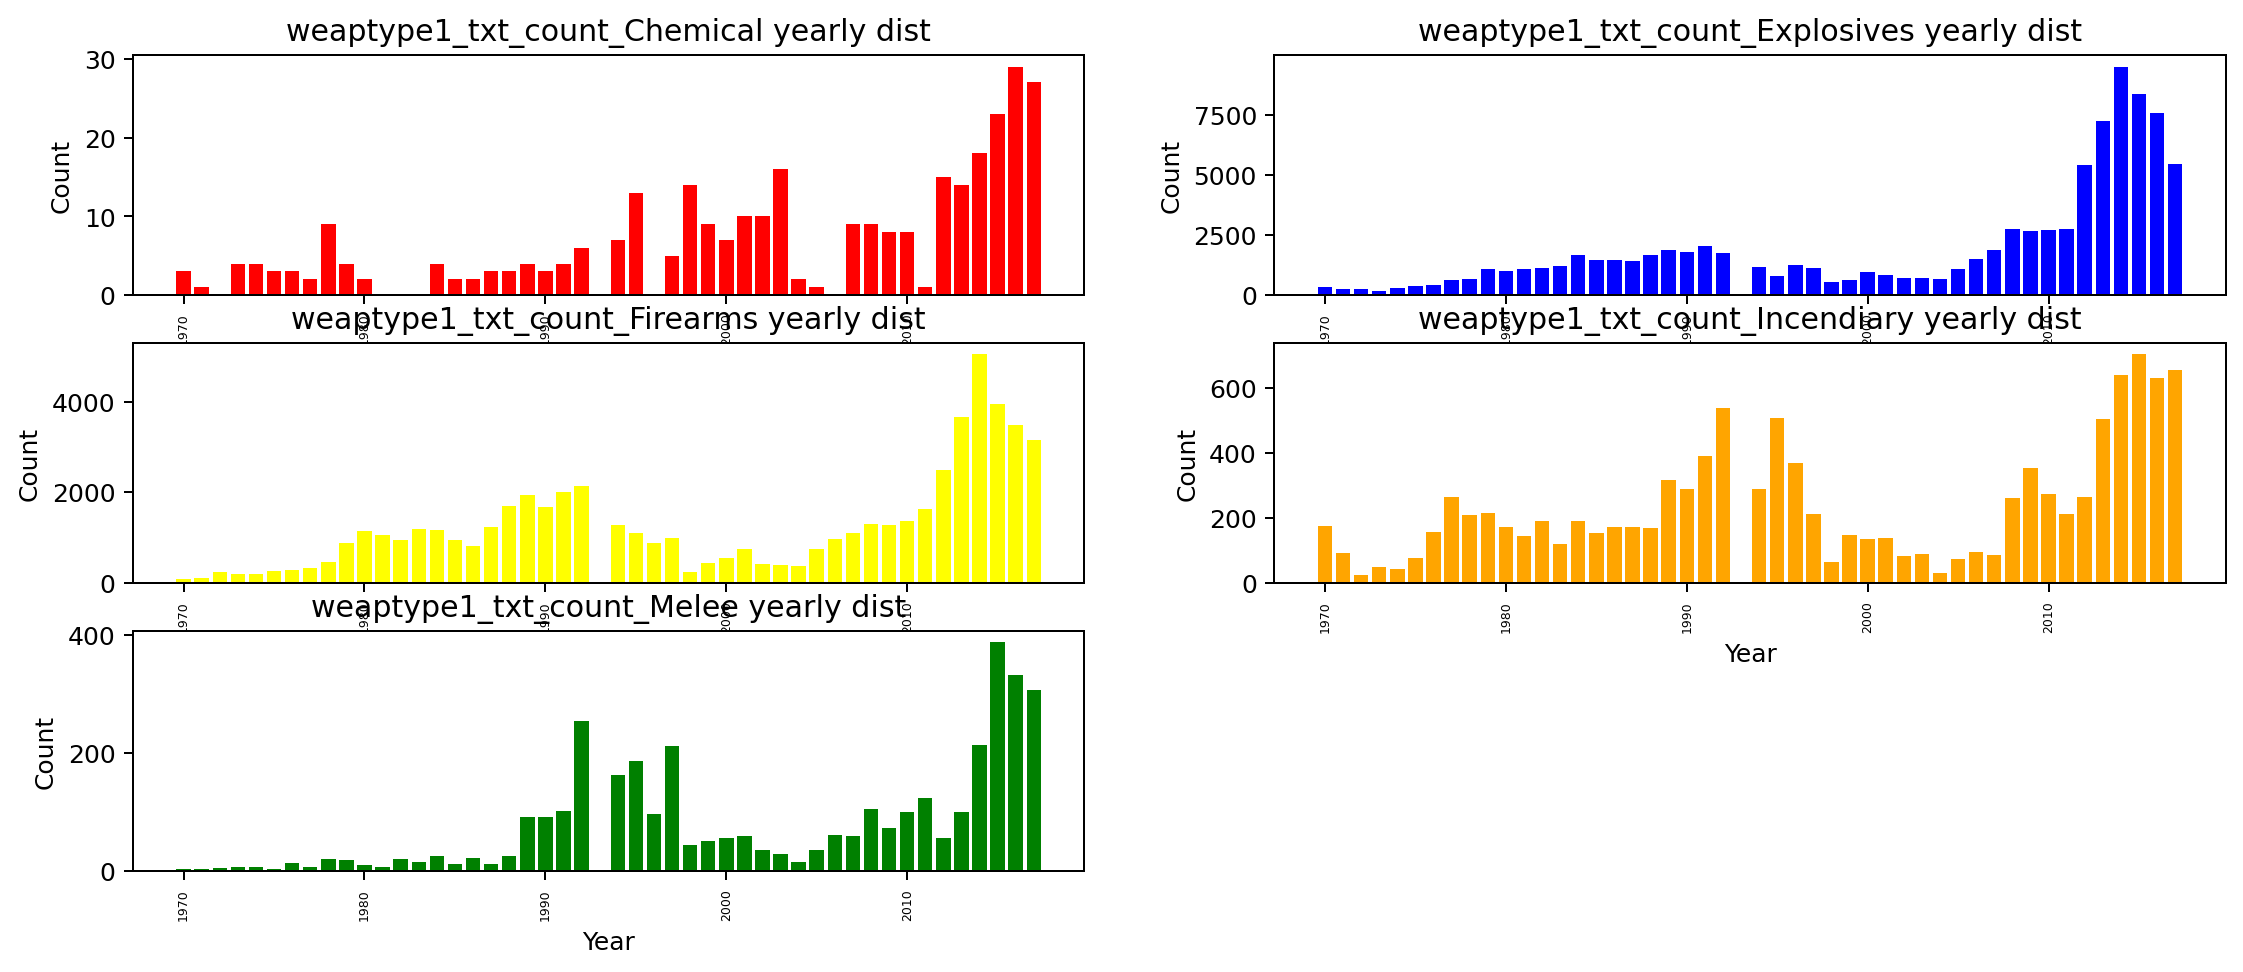

In [ ]:
weapons=gt_data2[(gt_data2.weaptype1_txt!="Unknown") & (gt_data2.weaptype1_txt!="Other")].weaptype1_txt.value_counts().sort_values(ascending=False)[:5]

wpn=weapons.reset_index()
wpn.columns=["weapontype","count"]
wpn 

weapons_yearly=gt_data2[gt_data2.weaptype1_txt.isin(wpn["weapontype"])].groupby(["iyear","weaptype1_txt"]).agg({"weaptype1_txt":["count"]})

www=weapons_yearly.unstack()


clr=["red","blue","yellow","orange","green"]
www.columns=["_".join(x) for x in www.columns.ravel()]
#www
plt.figure(figsize=(15,6),dpi=180)
n=1
for clm in www.columns:
  plt.subplot(3,2,n)
  plt.bar(data=www,x=www.index,height=clm,color=clr[n-1])
  plt.title("{} yearly dist".format(clm))
  plt.ylabel("Count")
  plt.xlabel("Year")
  plt.xticks(rotation=90)
  n+=1
plt.show()